In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#from datetime import timedelta
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from imblearn.combine import SMOTEENN

#### Função que permite ver os tipos de cada coluna, quantos valores únicos existem por coluna, valores nulos e a quantidade de linhas

In [2]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['DTypes'])
    summary_df['Nunique'] = df.nunique()
    summary_df['MissingValues'] = df.isnull().sum()
    summary_df['Count'] = df.count()
    
    print(summary_df)

In [3]:
def heatmap(df,title):
    
    fig, axes = plt.subplots(figsize=(15, 15))
    corr = df.corr()            # Calculate correlation of param

    mask = np.zeros_like(corr)   # Create a array of zeros with the same shape as the df provided
    # print(mask)

    mask[np.triu_indices_from(mask)] = True    # set the index of the upper triangle of the array to True (1)
    # print(mask)

    with sns.axes_style("white"):
        sns.heatmap(corr, linewidths=1, 
                    annot=True, 
                    mask=mask, 
                    vmax=.3, 
                    square=True,
                   fmt=".2f",
                   cbar=True)  # mask: data will not be
        plt.suptitle(title, size="30")
        
        


In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [5]:
## For n_classes higher than 3
def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    #weighted for imbalanced data
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    #y_test = pd.get_dummies(y_test)
    #y_pred = pd.get_dummies(y_pred)
    #print (y_pred.head())
    print (y_pred)
    n_classes = 3
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve 
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
    return roc_auc_score(y_test, y_pred, average=average)

In [6]:
def showScores(y_test, y_score, best_predictions, order ):
    order = str(order)
    #
    print ("Confusion matrix: ")
    cm = confusion_matrix(y_test, best_predictions)
    
    img = plt.figure()
    plot_confusion_matrix(cm, classes=["Ok", "Delayed"],
                      title='Confusion matrix')
    
    #
    fpr, tpr, threshold = roc_curve(y_test, best_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    img.savefig("imagens/confusion_matrix_"+order+".png")
    
    img = plt.figure()
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    img.savefig("imagens/ROC_"+order+".png")
    
    plt.show()    
#    print (" -----")
#    y_test = pd.DataFrame(y_test)
#    best_predictions = pd.DataFrame(best_predictions)

   # df = best_predictions.groupby('0').nunique()

   # print (df)
    #
    print ("Recall: ", recall_score(y_test, best_predictions, average = "weighted"))
    print ("Precision: ", precision_score(y_test, best_predictions, average = "weighted"))
    print("F1Score: ", f1_score(y_test,best_predictions, average = "weighted")) 
    print("Accuracy: ", accuracy_score(y_test,best_predictions))
    print ("AUC: ", roc_auc_score(y_test, y_score, average="weighted"))

#### Leitura do arquivo BrFlights2.csv:
1. Retirando colunas consideradas desnecessárias
2. Convertendo colunas para Y-%m-%d %H:%M:%S
3. Garantindo conversão para datetime
4. Guardando na Coluna AtrasoVoo o tempo de atraso de Voo
5. Preenchendo os NAs de AtrasoVoo com 100000, supondo que é um valor muito maior que o de um atraso normal

In [7]:



%matplotlib inline
flights = pd.read_csv("dados/BrFlights2.csv", encoding="utf8")
#Removendo colunas desnecessárias
flights.drop(["Codigo.Tipo.Linha","Companhia.Aerea","Pais.Origem","Pais.Destino", "Estado.Origem", "Estado.Destino", "Cidade.Origem", "Cidade.Destino"], axis=1, inplace=True)

#Convertendo para o formato %Y-%m-%d %H:%M:%S
# com o coerce o código executa e caso não consiga ler um valor, ele coloca NaT
flights['Partida.Prevista'] = pd.to_datetime(flights['Partida.Prevista'] , errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
flights['Partida.Real'] = pd.to_datetime(flights['Partida.Real'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
flights['Chegada.Prevista'] = pd.to_datetime(flights['Chegada.Prevista'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
flights['Chegada.Real'] = pd.to_datetime(flights['Chegada.Real'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')

flights['Chegada.Prevista'] = pd.to_datetime(flights['Chegada.Prevista'], errors='coerce')
flights['Partida.Prevista'] = pd.to_datetime(flights['Partida.Prevista'] , errors='coerce')
flights['Chegada.Real'] = pd.to_datetime(flights['Chegada.Real'], errors='coerce')
flights['Partida.Real'] = pd.to_datetime(flights['Partida.Real'] , errors='coerce')

flights["AtrasoVoo"] =flights['Chegada.Real'] - flights['Chegada.Prevista'] 
#Contando o tempo em minutos de voos que deram certo
flights['AtrasoVoo'] = flights['AtrasoVoo'].dt.total_seconds().div(60).fillna(100000).astype(int)

flights = flights.query("AtrasoVoo >=0") # Retirando minutos negativos devidos a diferentes motivos, pois a previsao de voos geralmente sao maiores para evitar problemas no tráfego aereo

display (flights.head())

print(list(flights['Situacao.Voo'].unique()),"\n")
#print(list(flights['Aeroporto.Origem'].unique()))
#print(list(flights['Codigo.Justificativa'].unique()))

# station,valid,lon,lat,tmpf, dwpf, relh, drct, sknt, p01i, alti, mslp, vsby, gust, skyc1, skyc2, skyc3, skyc4, skyl1, skyl2, skyl3, skyl4, wxcodes, ice_accretion_1hr, ice_accretion_3hr, ice_accretion_6hr, metar

flights['Codigo.Justificativa'] = flights['Codigo.Justificativa'].fillna("OK").astype(str)

,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,LatDest,LongOrig,LatOrig,AtrasoVoo
0,AAL - 203,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,2016-01-30 10:35:00,Realizado,NaN,Afonso Pena,Salgado Filho,-51.175381,-29.993473,-49.172481,-25.532713,0
1,AAL - 203,2016-01-13 12:13:00,2016-01-13 12:13:00,2016-01-13 21:30:00,2016-01-13 21:30:00,Realizado,NaN,Salgado Filho,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
2,AAL - 203,2016-01-29 12:13:00,2016-01-29 12:13:00,2016-01-29 21:30:00,2016-01-29 21:30:00,Realizado,NaN,Salgado Filho,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
4,AAL - 203,2016-01-30 12:13:00,2016-01-30 12:13:00,2016-01-30 21:30:00,2016-01-30 21:30:00,Realizado,NaN,Salgado Filho,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
5,AAL - 203,2016-01-03 23:05:00,2016-01-03 23:05:00,2016-01-04 07:50:00,2016-01-04 07:50:00,Realizado,NaN,Miami,Afonso Pena,-49.172481,-25.532713,-80.287046,25.795865,0


['Realizado', 'Cancelado'] 



In [8]:
summary(flights)

                              DTypes  Nunique  MissingValues    Count
Voos                          object     6252              0  2130690
Partida.Prevista      datetime64[ns]   683213              0  2130690
Partida.Real          datetime64[ns]   721015         289196  1841494
Chegada.Prevista      datetime64[ns]   718477              0  2130690
Chegada.Real          datetime64[ns]   746303         289196  1841494
Situacao.Voo                  object        2              0  2130690
Codigo.Justificativa          object       42              0  2130690
Aeroporto.Origem              object      189              0  2130690
Aeroporto.Destino             object      189              0  2130690
LongDest                     float64      189              0  2130690
LatDest                      float64      189              0  2130690
LongOrig                     float64      189              0  2130690
LatOrig                      float64      189              0  2130690
AtrasoVoo           

In [9]:
print(flights[flights['Situacao.Voo'] == "Cancelado" ].shape)
aux = flights[flights['Situacao.Voo'] == "Cancelado" ]
aux.to_csv("cancelados.csv", index=False)

(289196, 14)


#### Lendo códigos e aeroportos do arquivo 'codigos.csv' para substituir o nome contido em Aeroporto.Origem e Aeroporto.Destino pelo Codigo dele

In [10]:
codigos = pd.read_csv("dados/codigos.csv")
aeroportos = codigos.Codigo #Códigos como SBCT, SBGR... 

codigos = dict(zip(codigos.Nome, codigos.Codigo))
print (codigos)

flights.replace({"Aeroporto.Origem" : codigos}, inplace=True)
flights.replace({"Aeroporto.Destino" : codigos}, inplace=True)
flights.head(10)

{'Congonhas': 'SBSP', 'Guarulhos - Governador Andre Franco Montoro': 'SBGR', 'Viracopos': 'SBKP', 'Afonso Pena': 'SBCT', 'Salgado Filho': 'SBPA', 'Aeroporto Internacional Do Rio De Janeiro/Galeao': 'SBGL'}


,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,LatDest,LongOrig,LatOrig,AtrasoVoo
0,AAL - 203,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,2016-01-30 10:35:00,Realizado,OK,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,0
1,AAL - 203,2016-01-13 12:13:00,2016-01-13 12:13:00,2016-01-13 21:30:00,2016-01-13 21:30:00,Realizado,OK,SBPA,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
2,AAL - 203,2016-01-29 12:13:00,2016-01-29 12:13:00,2016-01-29 21:30:00,2016-01-29 21:30:00,Realizado,OK,SBPA,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
4,AAL - 203,2016-01-30 12:13:00,2016-01-30 12:13:00,2016-01-30 21:30:00,2016-01-30 21:30:00,Realizado,OK,SBPA,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
5,AAL - 203,2016-01-03 23:05:00,2016-01-03 23:05:00,2016-01-04 07:50:00,2016-01-04 07:50:00,Realizado,OK,Miami,SBCT,-49.172481,-25.532713,-80.287046,25.795865,0
6,AAL - 203,2016-01-05 23:05:00,2016-01-05 23:35:00,2016-01-06 07:50:00,2016-01-06 08:35:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Miami,SBCT,-49.172481,-25.532713,-80.287046,25.795865,45
7,AAL - 203,2016-01-18 12:13:00,2016-01-18 13:09:00,2016-01-18 21:30:00,2016-01-18 22:24:00,Realizado,CONEXAO DE AERONAVE,SBPA,Miami,-80.287046,25.795865,-51.175381,-29.993473,54
8,AAL - 203,2016-01-22 23:05:00,2016-01-22 23:05:00,2016-01-23 07:50:00,2016-01-23 07:50:00,Realizado,OK,Miami,SBCT,-49.172481,-25.532713,-80.287046,25.795865,0
9,AAL - 203,2016-01-15 23:05:00,2016-01-15 23:55:00,2016-01-16 07:50:00,2016-01-16 08:28:00,Realizado,ATRASOS NAO ESPECIFICOS - OUTROS,Miami,SBCT,-49.172481,-25.532713,-80.287046,25.795865,38
10,AAL - 203,2016-01-10 08:58:00,2016-01-10 10:22:00,2016-01-10 10:35:00,2016-01-10 11:31:00,Realizado,CONEXAO DE AERONAVE,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,56


#### Retirando voos que nao contem os aeroportos escolhidos (que estao no arquivo codigos.csv) e printando todos os Codigos.Justificativa existentes

In [11]:

flights = flights[flights["Aeroporto.Origem"].isin(aeroportos) | (flights["Aeroporto.Destino"].isin(aeroportos))]

print(flights.shape)
print(list(flights['Codigo.Justificativa'].unique()))

(1456956, 14)
['OK', 'LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO', 'CONEXAO DE AERONAVE', 'ATRASOS NAO ESPECIFICOS - OUTROS', 'DEFEITOS DA AERONAVE', 'AEROPORTO ORIGEM ABAIXO DOS LIMITES', 'OPERACAO DE VOO COM MAIS DE 04 HORAS DE ATRASO PANE AERONAVE', 'CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS', 'SEGURANCA/PAX/CARGA/ALARME', 'PLANO DE VOO -  APROVACAO', 'FALHA EQUIPO AUTOMOTIVO E DE ATENDIMENTO DE PAX', 'AEROPORTO COM RESTRICOES OPERACIONAIS', 'MIGRACAO/ALFANDEGA/SAUDE', 'AUTORIZADA', 'TROCA DE AERONAVE', 'AUTORIZADO', 'FACILIDADES DO AEROPORTO - RESTRICOES DE APOIO', 'AEROPORTO DE ORIGEM INTERDITADO', 'AVARIA DURANTE OPERACOES EM VOO', 'AVARIA DURANTE OPERACOES EM SOLO', 'CANCELAMENTO - AEROPORTO DESTINO ABAIXO LIMITES', 'AEROPORTO DESTINO ABAIXO DOS LIMITES', 'CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO CONDICOES METEOROLOGICAS', 'CANCELAMENTO - AEROPORTO ORIGEM ABAIXO LIMITES', 'CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENALIZADO AEROPORTO INTERDITADO', 'ATRASO DEVIDO R

#### Retirar Codigos.Justificativas nao necessarios (manter apenas os que envolvem problemas meteorológicos)

In [12]:
relevantes = ["OK","ATRASO DEVIDO RETORNO - CONDICOES METEOROLOGICAS","AEROPORTO ORIGEM ABAIXO DOS LIMITES","AEROPORTO DESTINO ABAIXO DOS LIMITES", "CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE IDA CANCELADO - CONDICOES METEOROLOGICAS" ]
flights = flights[flights["Codigo.Justificativa"].isin(relevantes) | flights["Codigo.Justificativa"].isnull()  ]
#flights.reset_index(drop=True,inplace=True)

#flights = flights[flights["Situacao.Voo"] != "Cancelado"]
print(flights.shape)
print(list(flights['Codigo.Justificativa'].unique())) #Confirmando que só ficaram essas colunas
#print(flights.groupby("Codigo.Justificativa"))



flights.head()



(1056323, 14)
['OK', 'AEROPORTO ORIGEM ABAIXO DOS LIMITES', 'AEROPORTO DESTINO ABAIXO DOS LIMITES', 'ATRASO DEVIDO RETORNO - CONDICOES METEOROLOGICAS', 'CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE IDA CANCELADO - CONDICOES METEOROLOGICAS']


,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,LatDest,LongOrig,LatOrig,AtrasoVoo
0,AAL - 203,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,2016-01-30 10:35:00,Realizado,OK,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,0
1,AAL - 203,2016-01-13 12:13:00,2016-01-13 12:13:00,2016-01-13 21:30:00,2016-01-13 21:30:00,Realizado,OK,SBPA,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
2,AAL - 203,2016-01-29 12:13:00,2016-01-29 12:13:00,2016-01-29 21:30:00,2016-01-29 21:30:00,Realizado,OK,SBPA,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
4,AAL - 203,2016-01-30 12:13:00,2016-01-30 12:13:00,2016-01-30 21:30:00,2016-01-30 21:30:00,Realizado,OK,SBPA,Miami,-80.287046,25.795865,-51.175381,-29.993473,0
5,AAL - 203,2016-01-03 23:05:00,2016-01-03 23:05:00,2016-01-04 07:50:00,2016-01-04 07:50:00,Realizado,OK,Miami,SBCT,-49.172481,-25.532713,-80.287046,25.795865,0


#### Caso o Codigo Justificativa contenha ORIGEM ou IDA indica que o problema ocorre no aeroporto de origem, por isso:
* Salvar o Aeroporto.Origem em Aeroporto.Importante e Partida.Prevista para Hora.Prevista e Partida.Real para Hora.Real 

#### Caso contrário:
* Salvar o Aeroporto.Destino em Aeroporto.Importante e Chegada.Prevista para Hora.Prevista e Chegada.Real para Hora.Real

OBS: Existem 4 tipos que contém uma das substring a seguir exclusivamente : "ORIGEM","IDA,"DESTINO","RETORNO"
OBS2: no caso do Codigo.Justificativa NaN eu escolhi o dados do Aeroporto Destino como referencia 
#### Depois mantendo apenas aeroportos escolhidos no arquivo "codigos.csv"

In [13]:
flights["Aeroporto.Importante"] =np.where(flights["Codigo.Justificativa"].str.contains("ORIGEM",na=False) | flights["Codigo.Justificativa"].str.contains("IDA",na=False), flights["Aeroporto.Origem"] , flights["Aeroporto.Destino"] )
flights["Hora.Prevista"] = np.where(flights["Codigo.Justificativa"].str.contains("ORIGEM",na=False) | flights["Codigo.Justificativa"].str.contains("IDA",na=False), flights["Partida.Prevista"] , flights["Chegada.Prevista"] )
flights["Hora.Real"] =np.where(flights["Codigo.Justificativa"].str.contains("ORIGEM",na=False) | flights["Codigo.Justificativa"].str.contains("IDA",na=False), flights["Partida.Real"] , flights["Chegada.Real"] )

flights = flights[flights["Aeroporto.Importante"].isin(aeroportos)]

n_delay = (flights[flights["Codigo.Justificativa"].str.contains("DESTINO",na=False) | flights["Codigo.Justificativa"].str.contains("RETORNO",na=False)].shape[0] + flights[flights["Codigo.Justificativa"].str.contains("ORIGEM",na=False)].shape[0])
print (n_delay)
n_cancel = flights[flights["Codigo.Justificativa"].str.contains("IDA",na=False)].shape[0]
print (n_cancel)


print ((flights[flights["Codigo.Justificativa"].str.contains("ORIGEM",na=False) | flights["Codigo.Justificativa"].str.contains("IDA",na=False)].shape[0] + flights[flights["Codigo.Justificativa"].str.contains("DESTINO",na=False)].shape[0] + flights[flights["Codigo.Justificativa"].str.contains("RETORNO",na=False)].shape[0])/flights.shape[0])
flights.head(7)

9013
488
0.015533418676397738


,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,LatDest,LongOrig,LatOrig,AtrasoVoo,Aeroporto.Importante,Hora.Prevista,Hora.Real
0,AAL - 203,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,2016-01-30 10:35:00,Realizado,OK,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,0,SBPA,2016-01-30 10:35:00,2016-01-30 10:35:00
5,AAL - 203,2016-01-03 23:05:00,2016-01-03 23:05:00,2016-01-04 07:50:00,2016-01-04 07:50:00,Realizado,OK,Miami,SBCT,-49.172481,-25.532713,-80.287046,25.795865,0,SBCT,2016-01-04 07:50:00,2016-01-04 07:50:00
8,AAL - 203,2016-01-22 23:05:00,2016-01-22 23:05:00,2016-01-23 07:50:00,2016-01-23 07:50:00,Realizado,OK,Miami,SBCT,-49.172481,-25.532713,-80.287046,25.795865,0,SBCT,2016-01-23 07:50:00,2016-01-23 07:50:00
12,AAL - 203,2016-01-05 08:58:00,2016-01-05 08:58:00,2016-01-05 10:35:00,2016-01-05 10:35:00,Realizado,OK,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,0,SBPA,2016-01-05 10:35:00,2016-01-05 10:35:00
14,AAL - 203,2016-01-31 08:58:00,2016-01-31 08:58:00,2016-01-31 10:35:00,2016-01-31 10:35:00,Realizado,OK,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,0,SBPA,2016-01-31 10:35:00,2016-01-31 10:35:00
16,AAL - 203,2016-01-12 08:58:00,2016-01-12 08:58:00,2016-01-12 10:35:00,2016-01-12 10:35:00,Realizado,OK,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,0,SBPA,2016-01-12 10:35:00,2016-01-12 10:35:00
18,AAL - 203,2016-01-21 23:05:00,2016-01-21 23:05:00,2016-01-22 07:50:00,2016-01-22 07:50:00,Realizado,OK,Miami,SBCT,-49.172481,-25.532713,-80.287046,25.795865,0,SBCT,2016-01-22 07:50:00,2016-01-22 07:50:00


#### Teste para checar se Aeroporto.Importante é igual ao Aeroporto.Origem se o código contém "Origem"

In [14]:
flights[flights["Codigo.Justificativa"].str.contains("ORIGEM",na=False)].head(5) 

,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,LatDest,LongOrig,LatOrig,AtrasoVoo,Aeroporto.Importante,Hora.Prevista,Hora.Real
685,AAL - 974,2016-01-15 23:00:00,2016-01-15 23:49:00,2016-01-16 09:11:00,2016-01-16 09:30:00,Realizado,AEROPORTO ORIGEM ABAIXO DOS LIMITES,SBGL,New York,-73.778139,40.641311,-43.249423,-22.813410,19,SBGL,2016-01-15 23:00:00,2016-01-15 23:49:00
7014,AZU - 2632,2016-01-12 16:18:00,2016-01-12 17:46:00,2016-01-12 17:32:00,2016-01-12 19:30:00,Realizado,AEROPORTO ORIGEM ABAIXO DOS LIMITES,SBKP,Tancredo Neves,-43.965396,-19.634099,-47.137569,-23.008205,118,SBKP,2016-01-12 16:18:00,2016-01-12 17:46:00
7192,AZU - 2639,2016-01-12 19:40:00,2016-01-12 19:58:00,2016-01-12 20:47:00,2016-01-12 21:08:00,Realizado,AEROPORTO ORIGEM ABAIXO DOS LIMITES,SBKP,Santos Dumont,-43.164876,-22.911144,-47.137569,-23.008205,21,SBKP,2016-01-12 19:40:00,2016-01-12 19:58:00
7221,AZU - 2641,2016-01-12 10:23:00,2016-01-12 10:39:00,2016-01-12 13:30:00,2016-01-12 13:47:00,Realizado,AEROPORTO ORIGEM ABAIXO DOS LIMITES,SBKP,Senador Petronio Portella,-42.821170,-5.063543,-47.137569,-23.008205,17,SBKP,2016-01-12 10:23:00,2016-01-12 10:39:00
7927,AZU - 2685,2016-01-12 23:22:00,2016-01-13 00:39:00,2016-01-13 02:10:00,2016-01-13 03:25:00,Realizado,AEROPORTO ORIGEM ABAIXO DOS LIMITES,SBKP,Orlando Bezerra De Menezes,-39.272229,-7.215097,-47.137569,-23.008205,75,SBKP,2016-01-12 23:22:00,2016-01-13 00:39:00


#### Convertendo colunas para datetime:
1. Caso contenha algum valor inválido será considerado NaT (devido ao errors='coerce')
2. Os valores em seguida são arredondados para a hora mais próxima com os minutos = "00"

In [15]:
flights['Hora.Real'] = pd.to_datetime(flights['Hora.Real'], errors='coerce')
flights['Hora.Prevista'] = pd.to_datetime(flights['Hora.Prevista'], errors='coerce')

flights["Hora.Real"] = pd.Series(flights["Hora.Real"]).dt.round("H")
flights["Hora.Prevista"] = pd.Series(flights["Hora.Prevista"]).dt.round("H")


#flights['Hora.Prevista'] = pd.to_datetime(flights['Hora.Prevista']) - timedelta(hours=2) #Test
flights.tail()

,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,LatDest,LongOrig,LatOrig,AtrasoVoo,Aeroporto.Importante,Hora.Prevista,Hora.Real
2542509,UAL - 129,2015-12-15 01:25:00,2015-12-15 01:25:00,2015-12-15 11:19:00,2015-12-15 11:19:00,Realizado,OK,Houston,SBGL,-43.249423,-22.81341,-95.336783,29.99022,0,SBGL,2015-12-15 11:00:00,2015-12-15 11:00:00
2542512,UAL - 129,2015-12-30 01:25:00,2015-12-30 01:25:00,2015-12-30 11:19:00,2015-12-30 11:19:00,Realizado,OK,Houston,SBGL,-43.249423,-22.81341,-95.336783,29.99022,0,SBGL,2015-12-30 11:00:00,2015-12-30 11:00:00
2542515,UAL - 129,2015-12-01 01:25:00,2015-12-01 01:25:00,2015-12-01 11:19:00,2015-12-01 11:19:00,Realizado,OK,Houston,SBGL,-43.249423,-22.81341,-95.336783,29.99022,0,SBGL,2015-12-01 11:00:00,2015-12-01 11:00:00
2542516,UAL - 129,2015-12-27 01:25:00,2015-12-27 01:25:00,2015-12-27 11:19:00,2015-12-27 11:19:00,Realizado,OK,Houston,SBGL,-43.249423,-22.81341,-95.336783,29.99022,0,SBGL,2015-12-27 11:00:00,2015-12-27 11:00:00
2542518,UAL - 129,2015-12-09 01:25:00,2015-12-09 01:25:00,2015-12-09 11:19:00,2015-12-09 11:19:00,Realizado,OK,Houston,SBGL,-43.249423,-22.81341,-95.336783,29.99022,0,SBGL,2015-12-09 11:00:00,2015-12-09 11:00:00


#### Leitura dos arquivos do METAR dos aeroportos
1. Leitura de cada aeroporto individualmente
2. Concatenação dos arquivos
3. Renomeando colunas (pois havia um espaço em branco no inicio de cada coluna)
4. Retirando colunas desnecessárias


In [16]:
for i in aeroportos:
    namefile = "dados/"+i+"_201601010000_201712010000.csv"
    try:
        data
    except NameError:
        data = pd.read_csv(namefile,skiprows=5, encoding="utf8")
    else:
        aux = pd.read_csv(namefile,skiprows=5, encoding="utf8")
        data = pd.concat([data, aux])

data.columns =['Aeroporto.Importante', 'Hora.Prevista', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 'metar']
data.drop(["wxcodes","ice_accretion_1hr", "ice_accretion_3hr","ice_accretion_6hr", "metar"], axis=1, inplace=True)
data.head()


,Aeroporto.Importante,Hora.Prevista,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4
0,SBSP,2016-01-01 00:00,-46.6554,-23.6267,77.00,66.20,69.33,320.00,11.00,0.0,...,6.21,M,FEW,BKN,M,M,4300.00,7700.00,M,M
1,SBSP,2016-01-01 01:00,-46.6554,-23.6267,75.20,68.00,78.34,310.00,7.00,0.0,...,6.21,M,M,M,M,M,M,M,M,M
2,SBSP,2016-01-01 01:01,-46.6554,-23.6267,75.20,68.00,78.34,320.00,8.00,0.0,...,6.21,M,M,M,M,M,M,M,M,M
3,SBSP,2016-01-01 02:00,-46.6554,-23.6267,73.40,66.20,78.19,340.00,11.00,0.0,...,6.21,M,FEW,M,M,M,1200.00,M,M,M
4,SBSP,2016-01-01 03:00,-46.6554,-23.6267,71.60,66.20,83.09,330.00,11.00,0.0,...,6.21,M,M,M,M,M,M,M,M,M


In [17]:
summary(data)

                       DTypes  Nunique  MissingValues   Count
Aeroporto.Importante   object        6              0  109031
Hora.Prevista          object    27278              0  109031
lon                   float64        6              0  109031
lat                   float64        6              0  109031
tmpf                   object       68              0  109031
dwpf                   object       62              0  109031
relh                   object     1038              0  109031
drct                   object       38              0  109031
sknt                   object       67              0  109031
p01i                  float64        1              0  109031
alti                   object       74              0  109031
mslp                   object        1              0  109031
vsby                   object       92              0  109031
gust                   object       39              0  109031
skyc1                  object        9              0  109031
skyc2   

In [18]:
print(list(data['skyc1'].unique()))
print(list(data['tmpf'].unique()))
print(list(data['dwpf'].unique()))

['FEW', 'M', 'BKN', 'SCT', 'OVC', 'NSC', 'NCD', 'VV ', '///']
['77.00', '75.20', '73.40', '71.60', '69.80', '80.60', '82.40', '84.20', '68.00', '66.20', '64.40', '78.80', '87.80', '89.60', '86.00', '62.60', '60.80', '91.40', 'M', '59.00', '57.20', '55.40', '53.60', '51.80', '50.00', '48.20', '46.40', '44.60', '42.80', '41.00', '93.20', '95.00', '32.00', '39.20', '37.40', '35.60', '96.80', '33.80', '30.20', '98.60', '100.40', 87.8, 86.0, 84.2, 82.4, 80.6, 78.8, 91.4, 95.0, 96.8, 98.6, 93.2, 89.6, 77.0, 75.2, 73.4, 71.6, 69.8, 68.0, 100.4, 102.2, 66.2, 64.4, 62.6, 60.8, 59.0, 57.2, 55.4]
['66.20', '68.00', '64.40', '69.80', '62.60', '60.80', '59.00', '57.20', '55.40', '42.80', '51.80', '53.60', '50.00', '71.60', 'M', '46.40', '48.20', '44.60', '41.00', '37.40', '35.60', '39.20', '32.00', '33.80', '30.20', '28.40', '24.80', '80.60', '73.40', '75.20', '77.00', '78.80', '26.60', '21.20', '23.00', '19.40', '15.80', 71.6, 73.4, 69.8, 68.0, 66.2, 75.2, 64.4, 62.6, 77.0, 78.8, 60.8, 59.0, 57.2,

#### Alterando valores de string das variáveis, para valores numéricos
Em level : Quanto maior o M melhor

Desconsiderando dados que não tem valores de tmpf até vsby
Serão removidas:
1. mslp, po1i por só terem um valor,
2. lat, lon por serem redudantes
3. Por achar que não é relevante já que isso varia de aeroporto para aeroporto
4. Por achar que pode ter muito ruído skyc4, skyl4

In [19]:
data = data.query('tmpf != "M"  and dwpf != "M" and vsby != "M" and alti != "M" and relh != "M" and sknt != "M" ')

In [20]:
coverage = {"M": 0, "FEW" : 2, "SCT": 4 ,"BKN": 6, "OVC": 8, "VV ": 8, "///": 8, "NSC": 0, "NCD": 2  }
level = {"M": 10000.00}
others = {"M":0}

data.replace({"skyc1" : coverage  , "skyc2" : coverage, "skyc3" : coverage, "skyc4" : coverage, "skyl1" : level , "skyl2" : level, "skyl3" : level, "skyl4" : level, "relh": others, "sknt": others, "gust": others}, inplace=True)

data.head()
#39344

,Aeroporto.Importante,Hora.Prevista,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4
0,SBSP,2016-01-01 00:00,-46.6554,-23.6267,77.00,66.20,69.33,320.00,11.00,0.0,...,6.21,0,2,6,0,0,4300.00,7700.00,10000,10000
1,SBSP,2016-01-01 01:00,-46.6554,-23.6267,75.20,68.00,78.34,310.00,7.00,0.0,...,6.21,0,0,0,0,0,10000,10000,10000,10000
2,SBSP,2016-01-01 01:01,-46.6554,-23.6267,75.20,68.00,78.34,320.00,8.00,0.0,...,6.21,0,0,0,0,0,10000,10000,10000,10000
3,SBSP,2016-01-01 02:00,-46.6554,-23.6267,73.40,66.20,78.19,340.00,11.00,0.0,...,6.21,0,2,0,0,0,1200.00,10000,10000,10000
4,SBSP,2016-01-01 03:00,-46.6554,-23.6267,71.60,66.20,83.09,330.00,11.00,0.0,...,6.21,0,0,0,0,0,10000,10000,10000,10000


In [21]:
summary(data)
data.drop(["mslp", "p01i","drct", "lat", "lon", "skyc4", "skyl4"], axis=1, inplace=True)

                       DTypes  Nunique  MissingValues   Count
Aeroporto.Importante   object        6              0  106467
Hora.Prevista          object    27086              0  106467
lon                   float64        6              0  106467
lat                   float64        6              0  106467
tmpf                   object       67              0  106467
dwpf                   object       61              0  106467
relh                   object     1036              0  106467
drct                   object       38              0  106467
sknt                   object       66              0  106467
p01i                  float64        1              0  106467
alti                   object       73              0  106467
mslp                   object        1              0  106467
vsby                   object       91              0  106467
gust                   object       39              0  106467
skyc1                   int64        5              0  106467
skyc2   

#### Checando colunas que contem a letra M, pois todas as colunas tem que ter valores numéricos e testando skc1
OBS: A coluna mslp foi mantida com "Ms", pois será deletada

In [22]:
data[data=="M"].any()
print(list(data['skyc1'].unique()))

[2, 0, 6, 4, 8]


#### Checando se contém o tipo datetime ou equivalente

In [23]:
data["Hora.Prevista"] = pd.to_datetime(data['Hora.Prevista'])
data["Hora.Prevista"].dtypes

dtype('<M8[ns]')

In [24]:
#Showing flights with canceled status
display(flights[flights['Situacao.Voo'] == "Cancelado" ].head(30))

,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,LatDest,LongOrig,LatOrig,AtrasoVoo,Aeroporto.Importante,Hora.Prevista,Hora.Real
31539,GLO - 1122,2016-01-09 07:38:00,NaT,2016-01-09 08:35:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,Regional De Maringa - Silvio Name Junior,-52.016484,-23.476610,-49.172481,-25.532713,100000,SBCT,2016-01-09 08:00:00,NaT
31724,GLO - 1124,2016-01-15 09:32:00,NaT,2016-01-15 11:06:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,Tancredo Neves,-43.965396,-19.634099,-49.172481,-25.532713,100000,SBCT,2016-01-15 10:00:00,NaT
31770,GLO - 1125,2016-01-16 09:45:00,NaT,2016-01-16 10:53:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,100000,SBCT,2016-01-16 10:00:00,NaT
31780,GLO - 1125,2016-01-15 09:45:00,NaT,2016-01-15 10:53:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,100000,SBCT,2016-01-15 10:00:00,NaT
48309,GLO - 1827,2016-01-14 20:00:00,NaT,2016-01-14 20:50:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBPA,Hercilio Luz,-48.545966,-27.670118,-51.175381,-29.993473,100000,SBPA,2016-01-14 20:00:00,NaT
57283,GLO - 2182,2016-01-15 19:20:00,NaT,2016-01-15 20:32:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBGR,Tancredo Neves,-43.965396,-19.634099,-46.478126,-23.434553,100000,SBGR,2016-01-15 19:00:00,NaT
102753,AZU - 4082,2016-02-19 07:55:00,NaT,2016-02-19 09:04:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBKP,-47.137569,-23.008205,-49.172481,-25.532713,100000,SBCT,2016-02-19 08:00:00,NaT
103249,AZU - 4103,2016-02-02 14:38:00,NaT,2016-02-02 15:35:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBKP,-47.137569,-23.008205,-49.172481,-25.532713,100000,SBCT,2016-02-02 15:00:00,NaT
110444,AZU - 4982,2016-02-01 08:50:00,NaT,2016-02-01 10:10:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,Regional De Maringa - Silvio Name Junior,-52.016484,-23.476610,-49.172481,-25.532713,100000,SBCT,2016-02-01 09:00:00,NaT
119369,GLO - 1123,2016-02-19 07:30:00,NaT,2016-02-19 08:30:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBPA,-51.175381,-29.993473,-49.172481,-25.532713,100000,SBCT,2016-02-19 08:00:00,NaT


#### Unindo tabelas
1. Unindo tabelas Voos existentes e dos Metar de cada Aeroporto
2. Os valores da Uniao são a Hora.Prevista (pois é a Hora que ocorreu o problema) e o Aeroporto.Importante (local onde ocorreu o problema) 
3. São mantidas as intersecções dos voos e dos metares existentes

In [25]:
#Juntando tabelas
Data = pd.merge(flights, data, how='inner', on=['Aeroporto.Importante', 'Hora.Prevista'])
display(Data.head(10))
print(Data.shape)

,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,...,sknt,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,AAL - 203,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,2016-01-30 10:35:00,Realizado,OK,SBCT,SBPA,-51.175381,...,7.00,29.85,6.21,0,0,0,0,10000,10000,10000
1,GLO - 1125,2016-01-30 09:45:00,2016-01-30 09:45:00,2016-01-30 10:53:00,2016-01-30 10:53:00,Realizado,OK,SBCT,SBPA,-51.175381,...,7.00,29.85,6.21,0,0,0,0,10000,10000,10000
2,TAM - 3289,2016-01-30 09:20:00,2016-01-30 09:20:00,2016-01-30 11:00:00,2016-01-30 11:00:00,Realizado,OK,SBGR,SBPA,-51.175381,...,7.00,29.85,6.21,0,0,0,0,10000,10000,10000
3,TAM - 3411,2016-01-30 08:20:00,2016-01-30 08:20:00,2016-01-30 10:40:00,2016-01-30 10:40:00,Realizado,OK,SBGL,SBPA,-51.175381,...,7.00,29.85,6.21,0,0,0,0,10000,10000,10000
4,AAL - 203,2016-01-03 23:05:00,2016-01-03 23:05:00,2016-01-04 07:50:00,2016-01-04 07:50:00,Realizado,OK,Miami,SBCT,-49.172481,...,6.00,30.06,3.73,0,6,6,0,500.00,700.00,10000
5,AZU - 5728,2016-01-04 06:41:00,2016-01-04 06:41:00,2016-01-04 07:57:00,2016-01-04 07:57:00,Realizado,OK,Adalberto Mendes Da Silva,SBCT,-49.172481,...,6.00,30.06,3.73,0,6,6,0,500.00,700.00,10000
6,TAM - 3001,2016-01-04 06:40:00,2016-01-04 06:40:00,2016-01-04 07:36:00,2016-01-04 07:36:00,Realizado,OK,SBSP,SBCT,-49.172481,...,6.00,30.06,3.73,0,6,6,0,500.00,700.00,10000
7,TAM - 3090,2016-01-04 07:02:00,2016-01-04 07:02:00,2016-01-04 08:13:00,2016-01-04 08:13:00,Realizado,OK,SBPA,SBCT,-49.172481,...,6.00,30.06,3.73,0,6,6,0,500.00,700.00,10000
8,TAM - 3157,2016-01-04 06:40:00,2016-01-04 06:40:00,2016-01-04 07:32:00,2016-01-04 07:32:00,Realizado,OK,SBGR,SBCT,-49.172481,...,6.00,30.06,3.73,0,6,6,0,500.00,700.00,10000
9,TAM - 3866,2016-01-04 07:02:00,2016-01-04 07:02:00,2016-01-04 08:30:00,2016-01-04 08:30:00,Realizado,OK,SBGL,SBCT,-49.172481,...,6.00,30.06,3.73,0,6,6,0,500.00,700.00,10000


(342335, 30)


In [26]:
display(Data[Data['Situacao.Voo'] == "Cancelado" ].head(30))

,Voos,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,LongDest,...,sknt,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
7014,GLO - 1827,2016-01-14 20:00:00,NaT,2016-01-14 20:50:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBPA,Hercilio Luz,-48.545966,...,16.00,29.85,6.21,0,0,0,0,10000,10000,10000
7425,GLO - 1125,2016-01-16 09:45:00,NaT,2016-01-16 10:53:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBPA,-51.175381,...,4.00,29.97,6.21,0,4,6,0,1300.00,3000.00,10000
8034,GLO - 1122,2016-01-09 07:38:00,NaT,2016-01-09 08:35:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,Regional De Maringa - Silvio Name Junior,-52.016484,...,2.00,30.00,6.21,0,2,0,0,1000.00,10000,10000
11919,GLO - 1124,2016-01-15 09:32:00,NaT,2016-01-15 11:06:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,Tancredo Neves,-43.965396,...,3.00,29.94,6.21,0,2,6,0,2000.00,10000.00,10000
11920,GLO - 1125,2016-01-15 09:45:00,NaT,2016-01-15 10:53:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBPA,-51.175381,...,3.00,29.94,6.21,0,2,6,0,2000.00,10000.00,10000
14221,GLO - 2182,2016-01-15 19:20:00,NaT,2016-01-15 20:32:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBGR,Tancredo Neves,-43.965396,...,4.00,29.83,1.24,0,6,8,0,500.00,1000.00,10000
19102,AZU - 4082,2016-02-19 07:55:00,NaT,2016-02-19 09:04:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBKP,-47.137569,...,2.00,30.00,1.55,0,8,0,0,100.00,10000,10000
19105,GLO - 1123,2016-02-19 07:30:00,NaT,2016-02-19 08:30:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBPA,-51.175381,...,2.00,30.00,1.55,0,8,0,0,100.00,10000,10000
24476,GLO - 1614,2016-02-29 18:55:00,NaT,2016-02-29 20:05:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBSP,SBGL,-43.249423,...,9.00,30.12,6.21,0,2,6,8,1500.00,1700.00,2100.00
25415,AZU - 4103,2016-02-02 14:38:00,NaT,2016-02-02 15:35:00,NaT,Cancelado,CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE...,SBCT,SBKP,-47.137569,...,6.00,30.12,6.21,0,6,6,0,1000.00,2000.00,10000


#### Retirando p0l1 e mslp, pois so contem um valor e não vão influenciar, além de retirar outras colunas desnecessarias

In [27]:
#Data.to_csv("preprocessado1.csv")

Data.drop(["Situacao.Voo", "Voos","Hora.Real" ,"Partida.Prevista","Partida.Real", "Chegada.Prevista", "Chegada.Real", "Aeroporto.Origem", "Aeroporto.Destino","LongDest","LatDest", "LongOrig", "LatOrig"], axis=1, inplace=True)

print(Data.shape)
Data.head(10)

summary(Data)

(342335, 17)
                              DTypes  Nunique  MissingValues   Count
Codigo.Justificativa          object        5              0  342335
AtrasoVoo                      int64      274              0  342335
Aeroporto.Importante          object        6              0  342335
Hora.Prevista         datetime64[ns]    13651              0  342335
tmpf                          object       67              0  342335
dwpf                          object       57              0  342335
relh                          object      950              0  342335
sknt                          object       61              0  342335
alti                          object       41              0  342335
vsby                          object       87              0  342335
gust                          object       35              0  342335
skyc1                          int64        5              0  342335
skyc2                          int64        5              0  342335
skyc3                

In [28]:
Data = Data.query('(AtrasoVoo >10 and AtrasoVoo <720) | AtrasoVoo == 100000 | AtrasoVoo == 0')
 # Atrasos não costumam passar de 12h e 
print (Data.shape)
#display (Data[aux])
print(list(Data['AtrasoVoo'].unique()))

summary(Data)

(340945, 17)
[0, 188, 84, 39, 19, 27, 13, 26, 56, 22, 17, 30, 51, 24, 15, 23, 32, 14, 28, 12, 21, 68, 50, 43, 47, 59, 33, 29, 42, 36, 20, 87, 158, 53, 58, 317, 16, 44, 65, 62, 61, 25, 81, 11, 60, 35, 90, 63, 104, 41, 88, 18, 109, 38, 34, 31, 69, 48, 67, 70, 72, 57, 46, 37, 204, 118, 85, 179, 77, 54, 160, 55, 75, 98, 92, 45, 106, 143, 169, 145, 210, 190, 78, 102, 73, 64, 126, 80, 139, 226, 101, 52, 324, 263, 138, 120, 161, 121, 114, 222, 200, 218, 203, 100000, 79, 95, 373, 133, 40, 205, 186, 49, 134, 117, 165, 115, 111, 107, 74, 146, 100, 91, 86, 83, 214, 93, 66, 97, 148, 96, 119, 159, 128, 124, 135, 129, 112, 71, 94, 182, 183, 130, 89, 123, 103, 150, 110, 180, 151, 181, 132, 76, 157, 233, 168, 258, 127, 253, 209, 199, 82, 108, 116, 105, 152, 174, 136, 167, 99, 170, 113, 312, 314, 189, 553, 220, 290, 176, 251, 125, 141, 122, 275, 206, 267, 212, 185, 198, 178, 166, 147, 177, 153, 149, 266, 243, 272, 282, 187, 184, 142, 131, 140, 221, 336, 229, 163, 195, 227, 194, 173, 137, 175, 252, 444,

In [29]:
Data.drop(["Aeroporto.Importante", 'Hora.Prevista', "AtrasoVoo"], axis=1, inplace=True)
#Data.to_csv("preprocessado2.csv")
summary(Data)

                      DTypes  Nunique  MissingValues   Count
Codigo.Justificativa  object        5              0  340945
tmpf                  object       67              0  340945
dwpf                  object       57              0  340945
relh                  object      950              0  340945
sknt                  object       61              0  340945
alti                  object       41              0  340945
vsby                  object       87              0  340945
gust                  object       35              0  340945
skyc1                  int64        5              0  340945
skyc2                  int64        5              0  340945
skyc3                  int64        5              0  340945
skyl1                 object       56              0  340945
skyl2                 object       76              0  340945
skyl3                 object       69              0  340945


#### Relevante[0] = OK -> 0 , Relevante[1] = Atraso tipo 1 -> 1 , Relevante[2] = Atraso tipo 2 -> 1, Relevante[3] = Atraso tipo 3 -> 1, Relevante[4] = Cancelado -> 1

In [30]:
Data.replace({"Codigo.Justificativa": {relevantes[0]: 0, relevantes[1]: 1 , relevantes[2]: 1, relevantes[3]: 1, relevantes[4]: 1}}, inplace=True) 

print(list(flights['Codigo.Justificativa'].unique()),"\n")


['OK', 'AEROPORTO ORIGEM ABAIXO DOS LIMITES', 'ATRASO DEVIDO RETORNO - CONDICOES METEOROLOGICAS', 'AEROPORTO DESTINO ABAIXO DOS LIMITES', 'CANCELAMENTO - CONEXAO AERONAVE/VOLTA - VOO DE IDA CANCELADO - CONDICOES METEOROLOGICAS'] 



### Data Visualization

In [31]:
Data.columns =['Cod','tmpf', 'dwpf', 'relh', 'sknt', 'alti', 'vsby', 'gust', 'skyc1', 'skyc2', "skyc3", 'skyl1', 'skyl2', "skyl3"]
Data.to_csv("preprocessado3.csv", index=False)



/home/pgdock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/pgdock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/pgdock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/pgdock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternat

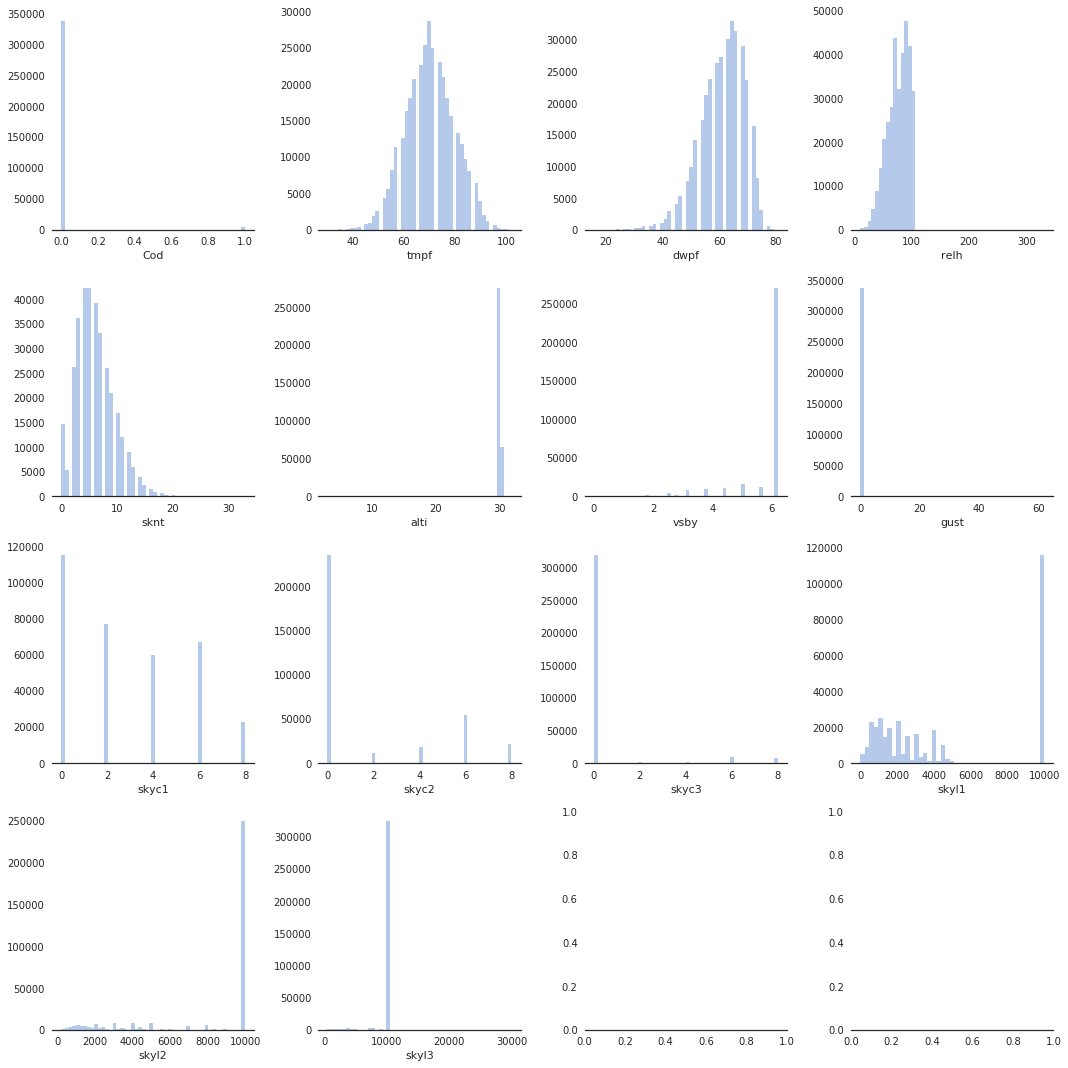

In [32]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(15,15))
sns.despine(left=True)

aux_0, aux_1 = 0,0

for i in Data:
    #print(i)
    Data[i] = pd.to_numeric(Data[i])
    sns.distplot(Data[i],  kde=False, color="b", ax=axes[aux_0, aux_1])
    if (aux_1 <3):
        aux_1 += 1
    elif (aux_1 ==3):
        aux_0 += 1
        aux_1 = 0
    plt.tight_layout()

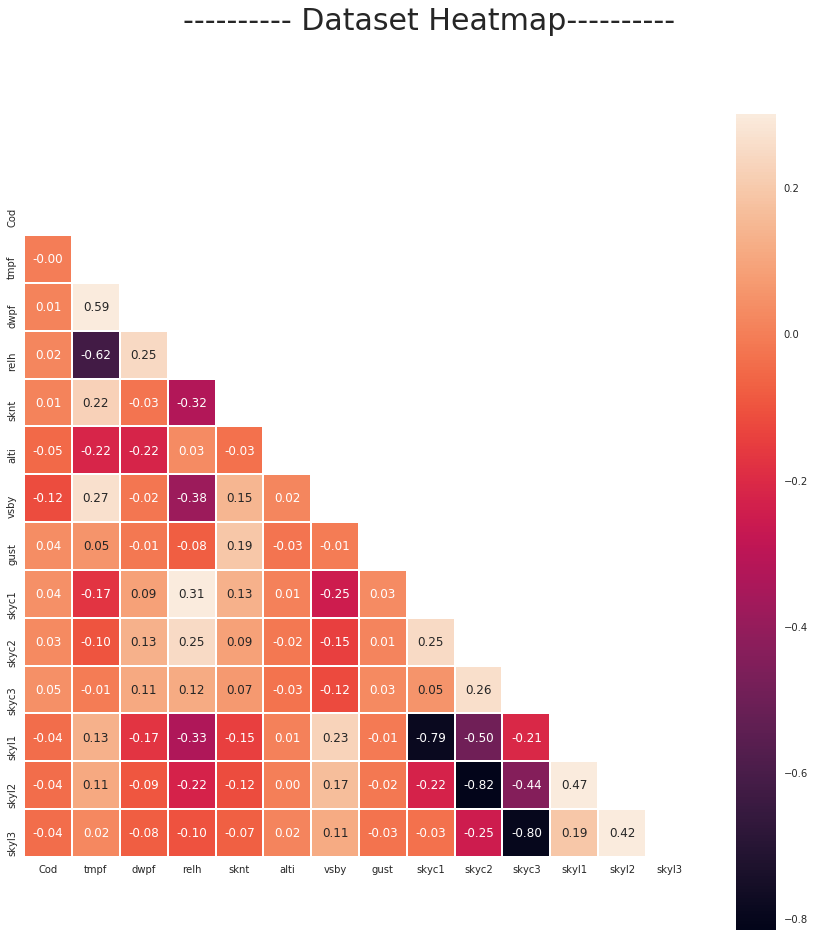

In [33]:
heatmap(Data,"---------- Dataset Heatmap----------")


In [34]:
summary(Data)
Data.head()

        DTypes  Nunique  MissingValues   Count
Cod      int64        2              0  340945
tmpf   float64       41              0  340945
dwpf   float64       36              0  340945
relh   float64      676              0  340945
sknt   float64       33              0  340945
alti   float64       41              0  340945
vsby   float64       62              0  340945
gust   float64       35              0  340945
skyc1    int64        5              0  340945
skyc2    int64        5              0  340945
skyc3    int64        5              0  340945
skyl1  float64       56              0  340945
skyl2  float64       75              0  340945
skyl3  float64       68              0  340945


,Cod,tmpf,dwpf,relh,sknt,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,0,77.0,71.6,83.44,7.0,29.85,6.21,0.0,0,0,0,10000.0,10000.0,10000.0
1,0,77.0,71.6,83.44,7.0,29.85,6.21,0.0,0,0,0,10000.0,10000.0,10000.0
2,0,77.0,71.6,83.44,7.0,29.85,6.21,0.0,0,0,0,10000.0,10000.0,10000.0
3,0,77.0,71.6,83.44,7.0,29.85,6.21,0.0,0,0,0,10000.0,10000.0,10000.0
4,0,62.6,62.6,100.00,6.0,30.06,3.73,0.0,6,6,0,500.0,700.0,10000.0


### Data Stats

In [35]:
Data.describe()

,Cod,tmpf,dwpf,relh,sknt,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
count,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000
mean,0.011676,70.137689,61.025332,75.515897,6.064647,30.063790,5.753801,0.268782,2.853070,1.748112,0.380912,4702.753230,8217.446802,9716.810629
std,0.107425,9.626414,7.734704,17.799009,3.508148,0.346316,1.076898,2.571751,2.612835,2.786370,1.557981,3933.444424,3163.871679,1353.113853
min,0.000000,30.200000,15.800000,9.910000,0.000000,3.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,500.000000
25%,0.000000,64.400000,55.400000,63.820000,4.000000,29.970000,6.210000,0.000000,0.000000,0.000000,0.000000,1300.000000,8000.000000,10000.000000
50%,0.000000,69.800000,62.600000,78.190000,6.000000,30.060000,6.210000,0.000000,2.000000,0.000000,0.000000,3000.000000,10000.000000,10000.000000
75%,0.000000,77.000000,66.200000,88.430000,8.000000,30.180000,6.210000,0.000000,6.000000,4.000000,0.000000,10000.000000,10000.000000,10000.000000
max,1.000000,102.200000,80.600000,331.090000,33.000000,31.920000,6.210000,62.000000,8.000000,8.000000,8.000000,10000.000000,10000.000000,30000.000000


In [36]:
#Data.drop(["alti","gust"], axis=1, inplace=True)

### Pré-processamento


In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import base as skBase
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE


from sklearn.neighbors import  KNeighborsClassifier


#from sklearn import metrics
#from sklearn.metrics import roc_curve, auc



#### Dividir dados

In [38]:


target = Data["Cod"] #Sem considerar minutos voo ou seria de regressao
features_data = Data.drop(["Cod"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_data, 
                                                    target, 
                                                    test_size = 0.1, 
                                                    random_state = 200)


print(X_test.shape[0])

34095


#### Normalização e Undersampling

In [39]:



scaler = preprocessing.StandardScaler()

transformer = RandomUnderSampler(random_state=200)
#transformer2 = SMOTE(random_state=100, n_jobs=-1)
#transformer3 = SMOTEENN(random_state=200, n_jobs=-1)

X_t = scaler.fit_transform(X_train)
#scorer = 'f1_weighted'
scorer = 'roc_auc'
print("Transforming...")


# For KNN
X_undersampled, y_undersampled = transformer.fit_sample(X_t,y_train.values.ravel())

#y_test = pd.get_dummies(y_test)
#y_undersampled = pd.get_dummies(y_undersampled) 
#target = pd.get_dummies(target)
#display(target.head())
    

#X_oversampled, y_oversampled = transformer2.fit_sample(X_t,y_train.values.ravel())
#print("Transformed! Smote")
#X_oversampled2, y_oversampled2 = transformer3.fit_sample(X_t,y_train.values.ravel())

#print("Transformed! SmoteNN")

/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Transforming...


### Benchmark

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')
Training time:  0.3434
------- BENCHMARK: -------


251355    0
53015     0
197606    0
148812    0
233920    0
335343    0
284881    0
Name: Cod, dtype: int64

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1


Confusion matrix: 
Confusion matrix, without normalization
[[  995 32728]
 [   14   358]]


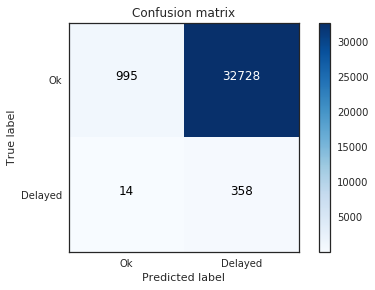

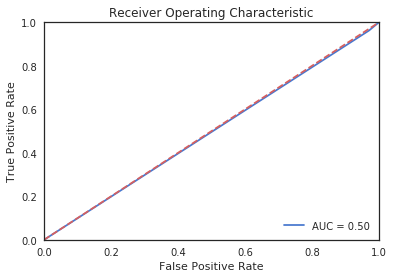

Recall:  0.03968323801143863
Precision:  0.9754836293829785
F1Score:  0.0569042164066362
Accuracy:  0.03968323801143863
AUC:  0.49593533847388543
------------------------------------------------


In [40]:
start = time()
clf = DecisionTreeClassifier()
parameters = {"random_state": [200]}
X_aux, y_aux = pd.DataFrame(X_undersampled), pd.DataFrame(y_undersampled)
estimator = (clf)

grid_obj = GridSearchCV(estimator, parameters,cv=10,scoring=scorer, return_train_score =True)
grid_fit = grid_obj.fit(X_aux, y_aux.values.ravel())

end = time()
trainTime = end - start
best_clf = grid_fit.best_estimator_
print(best_clf)
print ("Training time:  {:.4f}".format(trainTime))
    
best_predictions = pd.DataFrame(best_clf.predict(X_test))

print ("------- BENCHMARK: -------")
 #print ("Testing time:  {:.4f}".format(myMulti.testTime))
display(y_test.head(7))
display(best_predictions.head(7))

###
best_score = best_clf.predict_proba(X_test)
best_score = best_score[:,1]

showScores(y_test, best_score, best_predictions.iloc[:,0], 0)

###
#print ("AUC Score: ", multiclass_roc_auc_score(y_test, best_predictions.iloc[:,0]))
    
    ##

print ("------------------------------------------------")

#### GridSearch, confusion matrix, Accuracy, Fbeta Score

Samples of delayed or canceled flights
(3609, 1)
Actual data shape: 
(7218, 13) (7218, 1)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=200, verbose=0, warm_start=False)
Training time:  82.1886
------- Classificador 1: -------


0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: Cod, dtype: int64

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


Confusion matrix: 
Confusion matrix, without normalization
[[33723     0]
 [  372     0]]


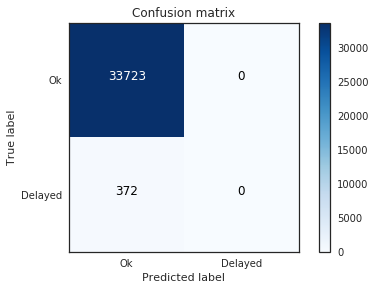

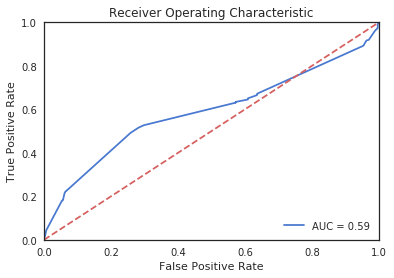

Recall:  0.9890893092828861
Precision:  0.9782976617376966
F1Score:  0.9836638879632772
Accuracy:  0.9890893092828861
AUC:  0.5890084827718806
------------------------------------------------
Samples of delayed or canceled flights
(3609, 1)
Actual data shape: 
(7218, 13) (7218, 1)


/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=500, random_state=200)
Training time:  573.5622
------- Classificador 2: -------


0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: Cod, dtype: int64

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


Confusion matrix: 
Confusion matrix, without normalization
[[33723     0]
 [  372     0]]


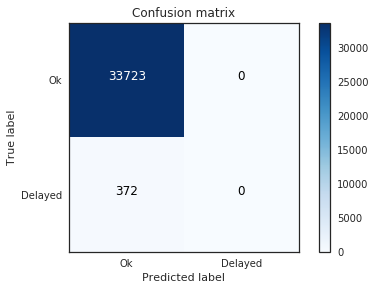

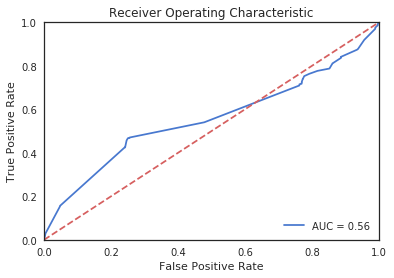

Recall:  0.9890893092828861
Precision:  0.9782976617376966
F1Score:  0.9836638879632772
Accuracy:  0.9890893092828861
AUC:  0.5562313650203317
------------------------------------------------
Samples of delayed or canceled flights
(3609, 1)
Actual data shape: 
(7218, 13) (7218, 1)


/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')
Training time:  94.3749
------- Classificador 3: -------


0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: Cod, dtype: int64

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


Confusion matrix: 
Confusion matrix, without normalization
[[33506   217]
 [  370     2]]


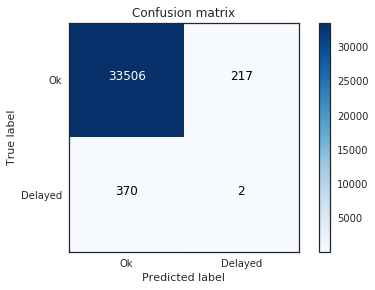

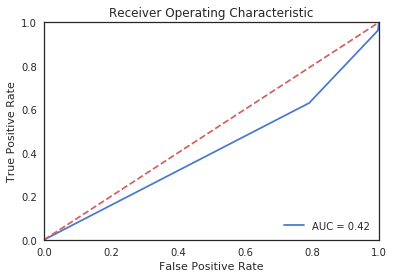

Recall:  0.9827833993254143
Precision:  0.978385932097205
F1Score:  0.9805743381395704
Accuracy:  0.9827833993254143
AUC:  0.41542218242933654
------------------------------------------------


In [41]:
for i in range(1,4):
    choice = i
    if (choice == 1):
        start = time()
        clf = RandomForestClassifier()
        parameters = {"random_state": [200], "n_estimators": [100,500,900], "n_jobs":[-1]}
        X_aux, y_aux = pd.DataFrame(X_undersampled), pd.DataFrame(y_undersampled)
    
    elif(choice ==2):
        start = time()
        clf = AdaBoostClassifier()
        parameters = {"random_state": [200], "base_estimator": [DecisionTreeClassifier(max_depth=8)], "n_estimators": [100,500,900], "learning_rate":[1,2]}
        X_aux, y_aux = pd.DataFrame(X_undersampled), pd.DataFrame(y_undersampled)
    
    elif(choice ==3):
        start = time()
        clf = KNeighborsClassifier()
        parameters = {'n_neighbors':list(range(1,15))}               
        X_aux, y_aux = pd.DataFrame(X_undersampled), pd.DataFrame(y_undersampled)

    estimator = (clf)
    
    print ("Samples of delayed or canceled flights")
    print ((y_aux[y_aux.iloc[:, 0]==1]).shape)
    print("Actual data shape: ")
    print (X_aux.shape, y_aux.shape)
          
    grid_obj = GridSearchCV(estimator, parameters,cv=10,scoring=scorer, return_train_score =True)
    grid_fit = grid_obj.fit(X_aux, y_aux.values.ravel())
    

    end = time()
    trainTime = end - start
    best_clf = grid_fit.best_estimator_
    print(best_clf)
    print ("Training time:  {:.4f}".format(trainTime))
    
    best_predictions = pd.DataFrame(best_clf.predict(X_test))
    y_test.reset_index(drop=True, inplace=True)

    print ("------- Classificador %d: -------" %i)
    #print ("Testing time:  {:.4f}".format(myMulti.testTime))
    display(y_test.head(7))
    display(best_predictions.head(7))

    
    ###
    best_score = best_clf.predict_proba(X_test)
    best_score = best_score[:,1]
    
    
    showScores(y_test, best_score, best_predictions.iloc[:,0], i)
    ###
    #print ("AUC Score: ", multiclass_roc_auc_score(y_test, best_predictions.iloc[:,0]))
    ##
    #print("FbetaScore: ", fbeta_score(y_test,best_predictions.iloc[:,0],beta=0.5, average="weighted"))
    print ("------------------------------------------------")
    #classificationReport

# 